## Creating a Filter, Edge Detection

### Import resources and display image

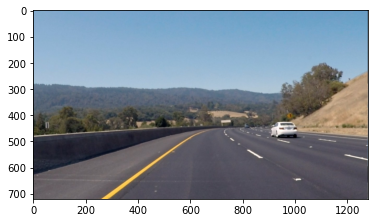

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import cv2
import numpy as np

%matplotlib inline

# Read in the image
image = mpimg.imread('data/curved_lane.jpg')

plt.imshow(image)

### Converting Color image to grayscale

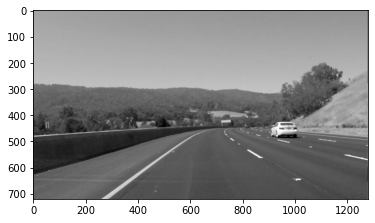

In [2]:
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
plt.imshow(gray, cmap='gray')

### Creating a custom kernel

Sobel filter is very commonly used in edge detection and in finding patterns in intensity in an image. Applying a Sobel filter to an image is a way of **taking (an approximation) of the derivative of the image** in the x or y direction, separately. The operators look as follows.

<img src="notebook_ims/sobel_ops.png" width=200 height=200>

### Defining a 3x3 Sobel X, Sobel Y custom kernel for edge detection

In [3]:
sobel_x = np.array([[-1, 0, 1],
                   [-2, 0, 2],
                   [-1, 0, 1]])

sobel_y = np.array([[-1,-2,-1], 
                   [ 0, 0, 0], 
                   [ 1, 2, 1]])

### Sobel X Filter

Filtering the image using filter2D, with inputs: (grayscale image, bit-depth, kernel)

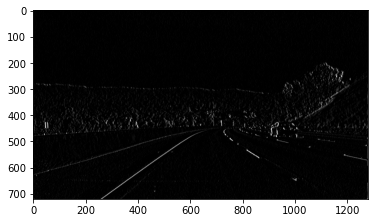

In [4]:
filtered_image = cv2.filter2D(gray, -1, sobel_x)

plt.imshow(filtered_image, cmap='gray')

### Sobel Y Filter

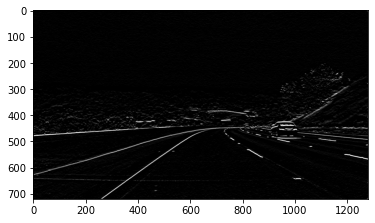

In [5]:
filtered_image = cv2.filter2D(gray, -1, sobel_y)

plt.imshow(filtered_image, cmap='gray')

### 5x5 Filter

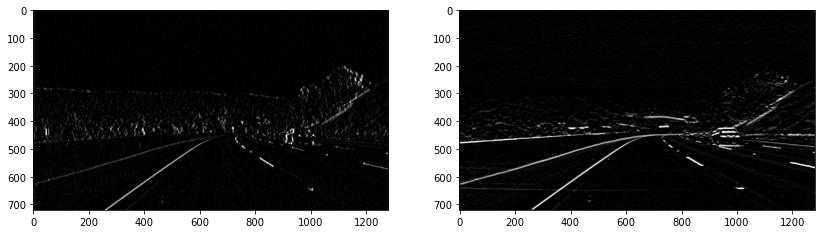

In [6]:
sobel_x = np.array([[-1, 1, 0, -1, 1],
                   [-2, 2, 0, -2, 2],
                   [-1, 1, 0, -1, 1],
                   [-2, 2, 0, -2, 2],
                   [-1, 1, 0, -1, 1]])

sobel_y = sobel_x.T

filtered_image_x = cv2.filter2D(gray, -1, sobel_x)
filtered_image_y = cv2.filter2D(gray, -1, sobel_y)

fig=plt.figure(figsize=(14, 14))

ax1 = fig.add_subplot(1, 2, 1)
plt.imshow(filtered_image_x, cmap='gray')
fig.add_subplot(1, 2, 2)
plt.imshow(filtered_image_y, cmap='gray')

plt.show()

### Filter with decimal value weights

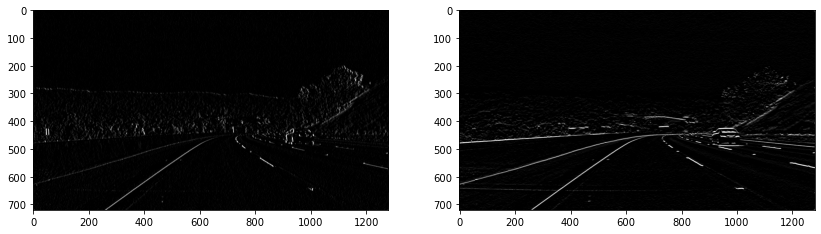

In [7]:
#Decimal Weights
sobel_x = np.array([[-.8, 0, .8],
                   [-1.2, 0, 1.2],
                   [-1.9, 0, 1.9]])


sobel_y = sobel_x.T

filtered_image_x = cv2.filter2D(gray, -1, sobel_x)
filtered_image_y = cv2.filter2D(gray, -1, sobel_y)

fig=plt.figure(figsize=(14, 14))

fig.add_subplot(1, 2, 1)
plt.imshow(filtered_image_x, cmap='gray')
fig.add_subplot(1, 2, 2)
plt.imshow(filtered_image_y, cmap='gray')

plt.show()

### Custom Filter

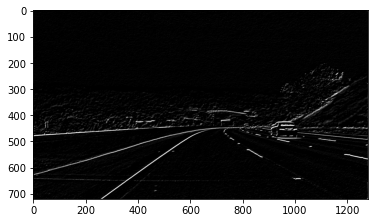

In [8]:
sobel = np.array([[ -1, -2, -1], 
                  [ -2,  0,  2], 
                  [  1,  2,  1]])
filtered_image = cv2.filter2D(gray, -1, sobel)
plt.imshow(filtered_image, cmap='gray')

### Image blurring

Filtering the image with averaging filter kernel

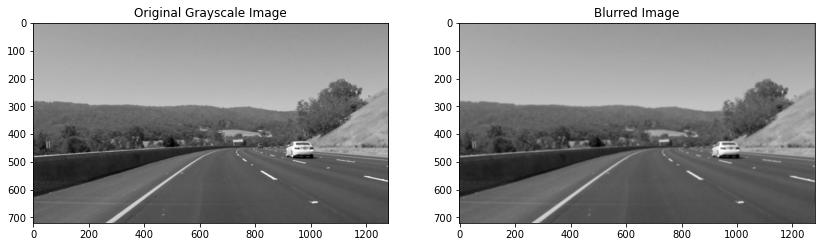

In [9]:
filter_blur = 1/25*np.array([[1,1,1,1,1],
                            [1,1,1,1,1],
                            [1,1,1,1,1],
                            [1,1,1,1,1],
                            [1,1,1,1,1]])

filter_blur = np.ones((5,5),np.float32)/25

filtered_image_blur = cv2.filter2D(gray, -1, filter_blur)
filtered_image_y = cv2.filter2D(gray, -1, sobel_y)

fig=plt.figure(figsize=(14, 14))

ax1 = fig.add_subplot(1, 2, 1)
ax1.title.set_text('Original Grayscale Image')
plt.imshow(gray, cmap='gray')
ax2 = fig.add_subplot(1, 2, 2)
ax2.title.set_text('Blurred Image')
plt.imshow(filtered_image_blur, cmap='gray')

plt.show()